# Loading Necessary Libraries

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sb

## Loading Dataset

In [2]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Exploratory Data Analysis

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [29]:
df.duplicated().sum()

np.int64(0)

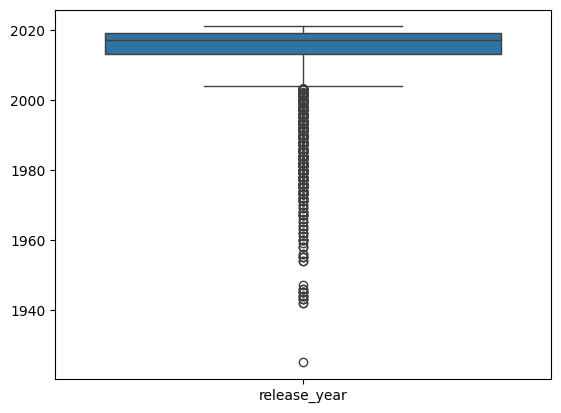

In [67]:
sb.boxplot(data=df, vert = True)
plt.show()

#Imputing Null Values

In [16]:
impute = SimpleImputer(strategy = 'most_frequent')

In [27]:
df[['director','date_added' ,'cast', 'country', 'rating','duration']] = impute.fit_transform(df[['director','date_added', 'cast', 'country', 'rating','duration']])

# Encoding Categorical Columns

In [21]:
df_encoded = df.copy()

In [22]:
le = LabelEncoder()

In [23]:
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,1699,603,1711,2020,7,210,274,2577
1,1111,1,1091,3392,409,426,1706,2021,11,110,414,1762
2,2222,1,2651,2105,6296,603,1706,2021,11,0,242,7341
3,3333,1,3506,3392,1699,603,1706,2021,11,0,297,3617
4,4444,1,3861,3392,4815,251,1706,2021,11,110,393,4416


# Verifying Changes Made

In [24]:
df_encoded.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   int64
 1   type          8807 non-null   int64
 2   title         8807 non-null   int64
 3   director      8807 non-null   int64
 4   cast          8807 non-null   int64
 5   country       8807 non-null   int64
 6   date_added    8807 non-null   int64
 7   release_year  8807 non-null   int64
 8   rating        8807 non-null   int64
 9   duration      8807 non-null   int64
 10  listed_in     8807 non-null   int64
 11  description   8807 non-null   int64
dtypes: int64(12)
memory usage: 825.8 KB


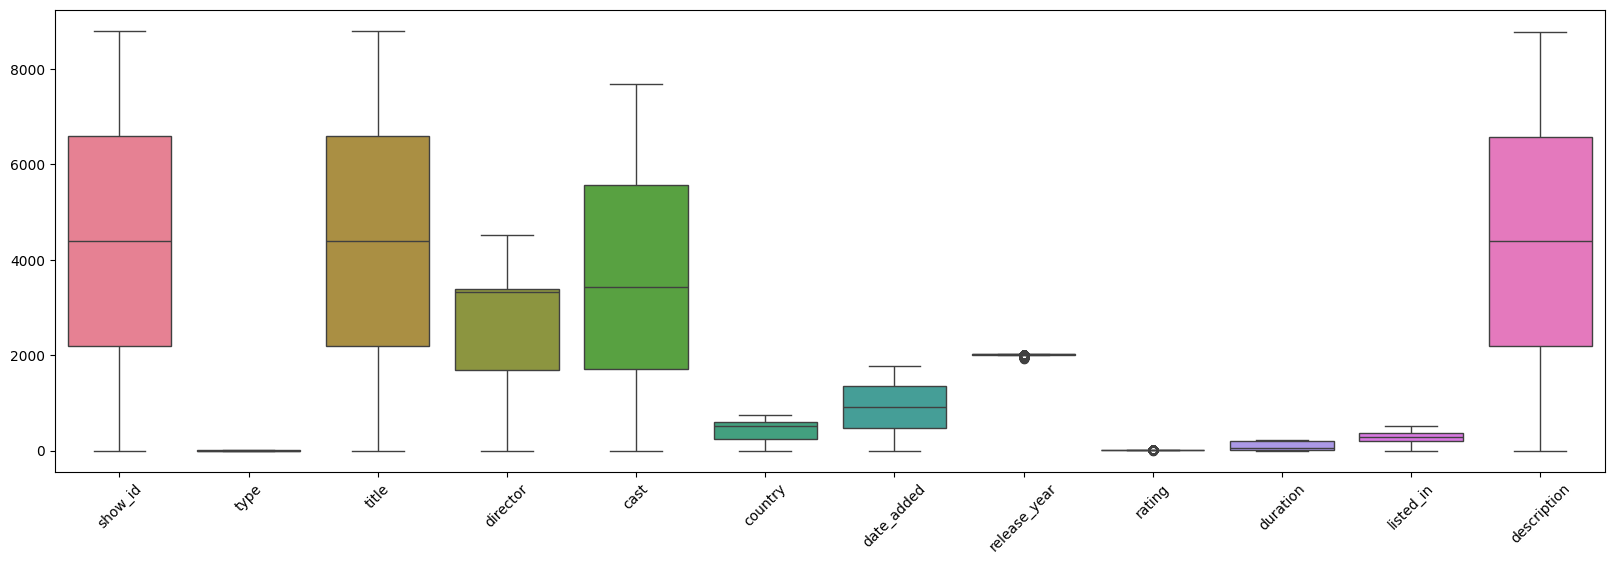

In [62]:
plt.figure(figsize=(20, 6))
sb.boxplot(data=df_encoded)
plt.xticks(rotation=45)
plt.show()